# Tensorflow Neural Network Tutorial on MNIST

In [ ]:
np.random.seed(1)
np.random.randint(0,)

In [9]:
a = [1,2,3]
b = ['m','b','c']
print(list(zip(a,b)))
[_ for _ in zip(a,b)]
# [i for i in range(2)]

[(1, 'm'), (2, 'b'), (3, 'c')]


[(1, 'm'), (2, 'b'), (3, 'c')]

In [43]:
# for _ in range(10):
#     print(np.random.randint(0,2,2))
for _ in range(10):
    print("{}".format(np.random.permutation(2)))
a = np.random.permutation(2)

[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]


In [17]:
import numpy as np
a = np.array([[1,2,3]])
a * (0.99 ** 3)

array([[0.970299, 1.940598, 2.910897]])

In [93]:
np.random.randint(0,2)

0

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import mnist
# from utilities import *
%matplotlib inline
np.random.seed(1)

In [21]:
w = tf.Variable(0,dtype=tf.float32)
cost = tf.add(tf.add(w ** 2,tf.multiply(-10.,w)),25)
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(w))

0.0


In [49]:
sess.run(train)
print(train)

name: "GradientDescent_5"
op: "NoOp"
input: "^GradientDescent_5/update_Variable_5/ApplyGradientDescent"



In [51]:
sess.run(w)

4.479656

In [59]:
for i in range(100):
    sess.run(train)
print(sess.run(w))

4.9999886


# Exploring the Tensorflow

-  initialize variables
-  create a session
-  run the operations inside the session.

In [62]:
x = tf.placeholder(tf.int64)
print(sess.run(x,feed_dict = {x:3}))

3


In [63]:
a = tf.constant(3)
b = tf.constant(4)
c = tf.multiply(a, b)
sess.run(c)

12

## Linear Function

Compute Y= WX + b where W and X are random matrices and b is a random vector.


In [75]:
np.random.seed(1)
X = tf.constant(np.random.randn(3,1))
W = tf.constant(np.random.randn(4,3))
b = tf.constant(np.random.randn(4,1))
Y = tf.add(tf.matmul(W,X),b)

sess = tf.Session()
result = sess.run(Y)
# sess.close()

print("Y:\n{}".format(result))
print(sess.run(Y))
np.exp(np.array([[5,3,6]]))/ np.sum(np.exp(np.array([[5,3,6]])))


Y:
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


array([[0.25949646, 0.03511903, 0.70538451]])

## Computing sigmoid

-  tf.sigmoid
-  tf.softmax

this exercise will be completed using a placeholder variable x. note:
-  when using placeholders we feed data into the placeholder using feed dictionary.

-  create a placeholder x
-  define the operations needed to compute the sigmoid using tf.sigmoid()
-  then run the session


In [67]:
x = tf.placeholder(tf.float32)
sigmoid = tf.sigmoid(x)

with tf.Session() as sess:
    result = sess.run(sigmoid,feed_dict ={x:0})
    
print(result)

0.5


## Computing the cost

In [19]:
z = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)

with tf.Session() as session:
    cost = session.run(cost,feed_dict={
        z:np.array([[0.2,0.4,0.5]]),
        y:np.array([[1,0,0]])
    })
print(cost)

[[0.59813887 0.91301525 0.974077  ]]


## One hot encoding

-  tf.one_hot(labels,depth,axis)

In [20]:
#DELETED THE TF.ONE_HOT FUNCTION

def one_hot_encode_labels(Y,depth):
    assert (Y.shape == (1,10000)) or (Y.shape == (1,60000))
    temp = np.zeros([depth,Y.shape[1]])
    for j in range(Y.shape[1]):
        temp[Y[0,j],j] = 1
    return temp

# Initialize with zeros and ones

-  use tf.ones(shape)
-  tf.zeros()

In [21]:
ones = tf.zeros([3,1])
sess = tf.Session()
ones = sess.run(ones)
sess.close()
print(ones.shape)

(3, 1)


# Building neural network for MNIST

Functions:
-  `one_hot_encode()`
-  `create_placeholders()`
-  `initialize_parameters()`
-  `forward_prop()`
-  `compute_cost()`
-  `back_prop()`
-  `model()`


# Import MNIST + one-hot encode labels

-  import the training data
-  one-hot encode the labels

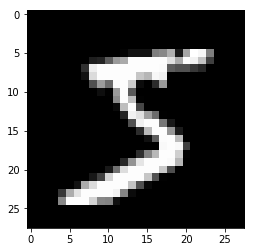

(10, 60000)
(784, 60000)


In [22]:
x_train,y_train = mnist.train_images().reshape(60000,-1).T,mnist.train_labels().reshape(1,-1)
plt.imshow(x_train[:,0].reshape(28,28),cmap='gray')
plt.show()

y_train = one_hot_encode_labels(Y = y_train,depth=10)
print(y_train.shape)
print(x_train.shape)

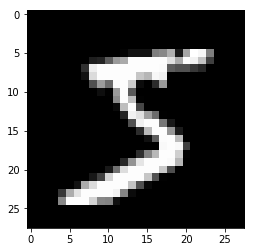

In [81]:
a = mnist.train_images()
a.shape
# a.reshape(a.shape[0],-1).shape
plt.imshow(a[0],cmap='gray')
plt.show()

# Create placeholders

In [23]:
def create_placeholders(n_x,n_y):
    """
    Creates the placeholders for the session.
    
    Arguments:
        
    Returns:
    
    Tips:
    -  None means the number of examples you will pass is flexible.
    
    """
    return (
        tf.placeholder(dtype="float",shape=(n_x,None)),
        tf.placeholder(dtype="float",shape=(n_y,None)),
    )

In [24]:
X, Y = create_placeholders(n_x=X.shape[0],n_y=Y.shape[0])

# Initialise network parameters

-  `tf.get_variable("W1",[#rows,#columns],initializer=tf.contrib.layers.xavier_initializer(seed=1))`

In [25]:
def initialise_parameters(layers):
    """
    Initialises the parameters to build a network with depth of layers.
    
    Arguments:
        layers - list of number of activation units in each layer including the input layer
               - [X,#layer1,#layer2,#layer3]
        
    Returns:
        a dictionary of tensors containing the network parameters
    """
    
#     tf.set_random_seed(1)
    return {
        "W1":tf.get_variable("W1",[layers[1],layers[0]],initializer = tf.contrib.layers.xavier_initializer(seed=1)),
        "b1":tf.get_variable("b1",[layers[1],1],initializer = tf.contrib.layers.xavier_initializer(seed=1)),
        "W2":tf.get_variable("W2",[layers[2],layers[1]],initializer = tf.contrib.layers.xavier_initializer(seed=1)),
        "b2":tf.get_variable("b2",[layers[2],1],initializer = tf.contrib.layers.xavier_initializer(seed=1)),
        "W3":tf.get_variable("W3",[layers[3],layers[2]],initializer = tf.contrib.layers.xavier_initializer(seed=1)),
        "b3":tf.get_variable("b3",[layers[3],1],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    }

In [39]:
tf.reset_default_graph() # use this line to reset the graph so the re-creation of tf variables dont throw a ValueError.
parameters = initialise_parameters([X.shape[0],25,12,10])
print(parameters["W3"])

<tf.Variable 'W3:0' shape=(10, 12) dtype=float32_ref>


# Forward Propagation

-  `tf.matmul`
-  `tf.add`
-  `tf.nn.relu`


-  <font color='red'> **Note: we don't apply activation function on the logits** </font>
-  Also, no need to return the layers as we only need the logits for back prop.

In [27]:
def forward_prop(X,parameters):
    """
    Implements forward prop for the model: LINEAR-> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
   
   
    Arguments:
        - X: input data of shape (784,None)
        - parameters: dictionary of network parameters
        
    Returns:
        - logits: last layers neurons without activation functions applied.
    """
    A1 = tf.nn.relu(
        tf.add(
            tf.matmul(
                parameters["W1"],X),
                parameters["b1"]
        )
    )
    A2 = tf.nn.relu(
        tf.add(
            tf.matmul(parameters["W2"],A1),
            parameters["b2"]
        )
    )
    return tf.add(
        tf.matmul(parameters["W3"],A2),parameters["b3"]
    )
    


The FailedPreconditionError arises because the program is attempting to read a variable (named "Variable_1") before it has been initialized. In TensorFlow, all variables must be explicitly initialized, by running their "initializer" operations. For convenience, you can run all of the variable initializers in the current session by executing the following statement before your training loop:

tf.initialize_all_variables().run()
Note that this answer assumes that, as in the question, you are using tf.InteractiveSession, which allows you to run operations without specifying a session. For non-interactive uses, it is more common to use tf.Session, and initialize as follows:

`init_op = tf.initialize_all_variables()`

`sess = tf.Session()`
`sess.run(init_op)`

In [43]:
tf.reset_default_graph()
X, Y = create_placeholders(n_x=x_train.shape[0],n_y=y_train.shape[0])
print(X.shape)
print(Y.shape)
parameters = initialise_parameters([X.shape[0],25,12,10])
logits = forward_prop(X,parameters)
logits2 = forward_prop(X,parameters)
print(logits.shape)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sftmax,l_exp = sess.run([
                        tf.nn.softmax(logits[:,0:2],axis=0),
                        tf.exp(logits[:,0:2]) / tf.reduce_sum(tf.exp(logits[:,0:2]),axis=0)
                        ],
                        feed_dict=  {
                            X:x_train,Y:y_train  
                                    })
    logits1,logits2 = sess.run ([logits,logits2], feed_dict={X:x_train, Y:y_train})
    
    w = 1
print(w)
print(sftmax[:,0:2])
print(l_exp[:,0:2])
print(logits.shape)

# a = tf.get_variable("w",[1])
# b = tf.get_variable("w",[1])

(784, ?)
(10, ?)
(10, ?)
1
[[0.00000000e+00 1.06826025e-17]
 [8.95857058e-32 1.42374512e-22]
 [3.32085573e-29 3.36789642e-27]
 [2.22648851e-24 9.49730559e-28]
 [3.43781561e-38 0.00000000e+00]
 [8.93594150e-17 2.41631730e-29]
 [1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 4.85515832e-19]
 [0.00000000e+00 1.26751302e-15]
 [5.89723870e-27 2.11766612e-19]]
[[0.0000000e+00 1.0682602e-17]
 [8.9585876e-32 1.4237445e-22]
 [3.3208494e-29 3.3678980e-27]
 [2.2264919e-24 9.4973229e-28]
 [3.4378092e-38 0.0000000e+00]
 [8.9359250e-17 2.4163242e-29]
 [1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 4.8551676e-19]
 [0.0000000e+00 1.2675106e-15]
 [5.8972333e-27 2.1176701e-19]]
(10, ?)


In [52]:
print(logits1[:,:2] == logits2[:,:2])
# print(logits2[:,:2])

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


In [29]:
sess = tf.Session()
q = sess.run(tf.nn.softmax(np.array([[0.2,0.2,0.6],[0.3,0.6,0.1]]),axis=0))
t = np.array([[0.2,0.2,0.6],[0.3,0.6,0.1]])
w = sess.run(tf.exp(t) / tf.reduce_sum(tf.exp(t),axis=0))

In [30]:
w

array([[0.47502081, 0.40131234, 0.62245933],
       [0.52497919, 0.59868766, 0.37754067]])

# Compute Cost

- `tf.nn.softmax_cross_entropy_with_logits(logits=...,labels=...)`


- **NOTE: inputs of this function are expected to be of shape(#examples,#classes). Thus you need to transpose logits, and Y before computing the cost.** 


-  `tf.reduce_mean does the summation over the examples.`

- note when running sess.run if we dont pass placeholders we dont need to use feed_dict.
- else, if we are using placeholders somewhere in the code then it is necessary to pass values to placeholders using feed_dict{}.

In [31]:
def compute_cost(logits,Y):
    """
    Computes the cost for the network.
    
    Arguments:
        - logits of the last layer
        - labels
    
    Returns:
        - Softmax cross entropy
    """
    
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(logits),labels=tf.transpose(Y)))

In [32]:
l = np.array([[0.2,0.4,0.1],[0.3,0.2,0.1],[0.5,0.4,0.8]])
y = np.array([[1,0,1],[0,1,0],[0,0,0]])
print("l:{}".format(l))
print("y:{}".format(y))
cost = compute_cost(l,y)
cost_with_placeholders = compute_cost(logits,Y)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
sess.run(cost)
sess.run(cost_with_placeholders,feed_dict ={
    X:x_train,
    Y:y_train
})

l:[[0.2 0.4 0.1]
 [0.3 0.2 0.1]
 [0.5 0.4 0.8]]
y:[[1 0 1]
 [0 1 0]
 [0 0 0]]


112.45628

# Backward Propagation + Parameter updates

After computing the **cost function** you will need to create an **optimiser** object.

-  Create an initialiser object.
-  Call it using sess.run()

For instance for grad descent optimizer we would do:


`optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)`

To actually evaluate the optimizer do:

`_, c = sess.run(
        [optimizer,cost],
        feed_dict = {
            X:minibatch_X,
            Y:minibatch_Y
        }
    )`
    
-  Note we use _ to throwaway the evaluated value of optimizer as we don't need to use it.
-  c takes the value of the cost returned upon evaluation.

# Build and Train the Model

In [87]:
np.random.permutation(11)
a = np.random.randn(4,5)
print(a)
print(a[np.random.permutation(4)])

[[ 1.2245077   0.09418039 -0.28316929 -0.39571274 -0.71243197]
 [-1.35634559 -0.8377157  -0.49391067 -0.14144644 -0.87467077]
 [ 1.0468758   0.26983708  0.40891533 -0.33733696  0.11074674]
 [ 0.57440022  0.68663023  1.72377011 -2.42197115 -1.50118296]]
[[ 0.57440022  0.68663023  1.72377011 -2.42197115 -1.50118296]
 [-1.35634559 -0.8377157  -0.49391067 -0.14144644 -0.87467077]
 [ 1.0468758   0.26983708  0.40891533 -0.33733696  0.11074674]
 [ 1.2245077   0.09418039 -0.28316929 -0.39571274 -0.71243197]]


In [79]:
def get_random_batch(X,Y,seed):
    np.random.seed(seed)
    permutation = np.random.permutation(X.shape[1])
    shuffled_x = X[:,permutation]
    shuffled_y = Y[:,permutation]
    return getBatch(128, shuffled_x, shuffled_y)
#     plt.imshow(batch[0][0][:,0].reshape(28,28),cmap='gray')
#     plt.show()
#     batch[0][1][:,0]


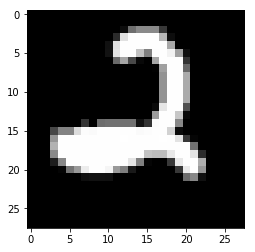

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
seed = 2
batch = get_random_batch(X = x_train, Y = y_train, seed=seed)
plt.imshow(batch[0][0][:,0].reshape(28,28),cmap='gray')
plt.show()
batch[0][1][:,0]


In [81]:
def model(X_train,Y_train,x_test,y_test,learning_rate=1e-4,epochs=1000,minibatch_size=128):
    """
    Builds the a neural network and trains it.
    LINEAR-> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Number of logits in the output layer: 10
    
    Arguments:
        - X_train -> training input of shape (#input features = 784, #training examples = 60000)
        - Y_train -> training labels of shape (#classes = 10, # training labels = 60000)
        - hyperparameters: learning_rate, epochs, minibatch_size
    
    Returns:
        - trained parameters.
    """
    
    ops.reset_default_graph()                           #reset the graph to prevent overwriting tf variables
    tf.set_random_seed(1)
    
    __NUMBER_OF_CLASSESS = Y_train.shape[0]
    __NUMBER_OF_FEATURES = X_train.shape[0]
    __LAYERS = [__NUMBER_OF_FEATURES,25,12,10]
    
    
    
# create placeholders
# initialise parameters
# forward prop
# compute cost
# optimize

# initialize global variables
# for each loop do:
#     run optimizer
    
    X, Y = create_placeholders(n_x = __NUMBER_OF_FEATURES,n_y = __NUMBER_OF_CLASSESS)
    parameters = initialise_parameters(__LAYERS)
    logits = forward_prop(X = X ,parameters = parameters)
    cost = compute_cost(logits = logits, Y = Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    softmax = tf.nn.softmax(logits,axis=0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(softmax,axis=0),tf.argmax(Y)),'float'))
    
    init = tf.global_variables_initializer()
    seed = 1
    costs = []
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epochs):
            epoch_cost = 0
            trainingBatch = get_random_batch(X = X_train, Y = Y_train, seed = seed + 1)
            __NUMBER_OF_MINIBATCHES = len(trainingBatch)
            for batch in trainingBatch:
                _ , minibatch_cost = sess.run(
                            [optimizer,cost],
                            feed_dict ={
                                X: batch[0],
                                Y: batch[1]
                            }
                        )
                
                epoch_cost += minibatch_cost
            costs.append(epoch_cost / __NUMBER_OF_MINIBATCHES)
            print("Epoch:{}\t Cost:{}".format(epoch,epoch_cost / __NUMBER_OF_MINIBATCHES))
        training_accuracy = sess.run(accuracy, feed_dict ={
            X:x_train,
            Y:y_train
        })
        test_accuracy = sess.run(accuracy, feed_dict ={
            X:x_test,
            Y:y_test
        })
        print("\n\nTraining accuracy:{}".format(training_accuracy))
        print("Test accuracy:{}".format(test_accuracy))
        plt.plot(np.squeeze(costs)) 
        return sess.run(parameters)


Import the test set

Epoch:0	 Cost:8.500820648949793
Epoch:1	 Cost:2.2645554839929285
Epoch:2	 Cost:2.012695349101573
Epoch:3	 Cost:1.8437404159798043
Epoch:4	 Cost:1.7498045620887772
Epoch:5	 Cost:1.6831159614550788
Epoch:6	 Cost:1.6233491285015016
Epoch:7	 Cost:1.552629985280637
Epoch:8	 Cost:1.4985240194589091
Epoch:9	 Cost:1.4519597792676262
Epoch:10	 Cost:1.4076689278393157
Epoch:11	 Cost:1.3127902225136503
Epoch:12	 Cost:1.2172946364386503
Epoch:13	 Cost:1.1544798756204944
Epoch:14	 Cost:1.1084368903753854
Epoch:15	 Cost:1.0682361823663529
Epoch:16	 Cost:1.032265441885381
Epoch:17	 Cost:1.0004065536232645
Epoch:18	 Cost:0.9680245119625571
Epoch:19	 Cost:0.9415585840943017
Epoch:20	 Cost:0.9131652531084984
Epoch:21	 Cost:0.8860515206099064
Epoch:22	 Cost:0.8619917057978828
Epoch:23	 Cost:0.8384449328186669
Epoch:24	 Cost:0.8137998672436549
Epoch:25	 Cost:0.7905214821606048
Epoch:26	 Cost:0.7714424184136299
Epoch:27	 Cost:0.7535698509165473
Epoch:28	 Cost:0.7375083096754322
Epoch:29	 Cost:0.72131748710

Epoch:235	 Cost:0.1185952531519348
Epoch:236	 Cost:0.11790945720491505
Epoch:237	 Cost:0.12243159672519419
Epoch:238	 Cost:0.1201634887359671
Epoch:239	 Cost:0.11902509584053875
Epoch:240	 Cost:0.11794952960061367
Epoch:241	 Cost:0.11842657055364235
Epoch:242	 Cost:0.11780879696978054
Epoch:243	 Cost:0.11644140588465149
Epoch:244	 Cost:0.11896641501612755
Epoch:245	 Cost:0.12053100427966128
Epoch:246	 Cost:0.11758702421493368
Epoch:247	 Cost:0.11685720352587034
Epoch:248	 Cost:0.11968668929732112
Epoch:249	 Cost:0.11643580101859341
Epoch:250	 Cost:0.11631132466102968
Epoch:251	 Cost:0.1169066162966589
Epoch:252	 Cost:0.11841982694021039
Epoch:253	 Cost:0.11786483450612026
Epoch:254	 Cost:0.11603284695112248
Epoch:255	 Cost:0.11682026263382007
Epoch:256	 Cost:0.1156073475935693
Epoch:257	 Cost:0.11530980693776088
Epoch:258	 Cost:0.11542449714834375
Epoch:259	 Cost:0.11883658437983695
Epoch:260	 Cost:0.11556363724537495
Epoch:261	 Cost:0.11485793337877244
Epoch:262	 Cost:0.11625291172788

Epoch:464	 Cost:0.09097928548259522
Epoch:465	 Cost:0.09316645638504897
Epoch:466	 Cost:0.09255646379477879
Epoch:467	 Cost:0.09803743167385173
Epoch:468	 Cost:0.09237713440617265
Epoch:469	 Cost:0.09254911466281233
Epoch:470	 Cost:0.09057433346409534
Epoch:471	 Cost:0.09310974436266019
Epoch:472	 Cost:0.09074304535436922
Epoch:473	 Cost:0.09082792141337766
Epoch:474	 Cost:0.09174409444366437
Epoch:475	 Cost:0.09110300891053702
Epoch:476	 Cost:0.09152646978765028
Epoch:477	 Cost:0.09239690955966584
Epoch:478	 Cost:0.09068451367461605
Epoch:479	 Cost:0.09276563040951867
Epoch:480	 Cost:0.09354968789194439
Epoch:481	 Cost:0.09176778658898845
Epoch:482	 Cost:0.08866845823522569
Epoch:483	 Cost:0.0904108536666009
Epoch:484	 Cost:0.09088470217888989
Epoch:485	 Cost:0.09339555685144307
Epoch:486	 Cost:0.09128286658144837
Epoch:487	 Cost:0.09530091424510359
Epoch:488	 Cost:0.0920723373038587
Epoch:489	 Cost:0.09004120468727943
Epoch:490	 Cost:0.08919222743661483
Epoch:491	 Cost:0.090425745590

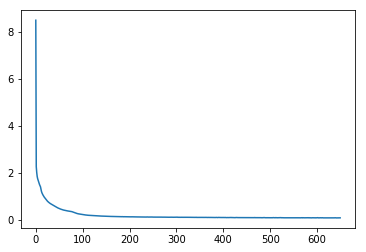

In [86]:
tf.reset_default_graph()

# NORMALISE INPUTS
x_test = mnist.test_images().reshape(10000,-1).T
y_test = mnist.test_labels().reshape(-1,1).T
y_test = one_hot_encode_labels(y_test,depth = 10)
trained_parameters = model(X_train = x_train , Y_train = y_train, x_test=x_test, y_test=y_test, epochs = 650)